In [258]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1> Simple Linear Regression </h1>

Linear approach to modelling the relationship between a response variable and one or more explanatory variables.

In Simple Linear Regression we have one explanatory variable (e.g. using height to predict weight).

Our aim is to find a linear function which predicts the response variable as a function of the explanatory variables.

To do so we make use of something called the ordinary least squares method (OLS). Essentially the accuracy of each prediction is measures by its squared residual (residual being the vertical distance between the fitted line and the true data point). With our goal to be minimising the sum of the squared residuals (SSR).

Function for a linear regression model:

$$ y=\alpha +\beta x $$

However, we have errors in this as the general relationship may not hold exaclty for the entire population of values of x (explanatory) and y (response). Essentially we cannot model any random process perfectly so we must account for this in our model. So we use the function:

$$  y_i = \alpha + \beta x_i + \varepsilon_i $$

This is a linear regression model.

The crux of this problem is given n data pairs (x_i, y_i) how can we estimate alpha and beta and this is where the error term comes in, the formula for the error term of any data pair is:

$$ {\displaystyle {\widehat {\varepsilon }}_{i}=y_{i}-\alpha -\beta x_{i}.} $$ 

(hat means an estimation)

Therefore the sum of squared residuals and our problem end up being:

$$ {\displaystyle {\text{Find }}\min _{\alpha ,\,\beta }Q(\alpha ,\beta ),\quad {\text{for }}Q(\alpha ,\beta )=\sum _{i=1}^{n}{\widehat {\varepsilon }}_{i}^{\,2}=\sum _{i=1}^{n}(y_{i}-\alpha -\beta x_{i})^{2}\ .}$$

<h3>There are 2 ways to get an estimate of alpha and beta. The first is with an analytical approach and the second in with an iterative approach. We go over the analytic approach first</h3>

With some rearranging we get:

$${\textstyle {\begin{aligned}{\widehat {\alpha }}&={\bar {y}}-({\widehat {\beta }}\,{\bar {x}}),\\[5pt]{\widehat {\beta }}&={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}\\[6pt]\end{aligned}}}$$

In [300]:
#Calculating alphahat and betahat using the analytical approach
x = np.array([1.47,1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65,
             1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83])
y = np.array([52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29,
              63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46])

We need to solve the following equations to estimate beta and alpha hat

$${\textstyle {\begin{aligned}{\widehat {\alpha }}&={\bar {y}}-({\widehat {\beta }}\,{\bar {x}}),\\[5pt]{\widehat {\beta }}&={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}\\[6pt]\end{aligned}}}$$

In [302]:
xbar = x.mean()
ybar = y.mean()

# beta hat
sum_numerator = 0
sum_denominator = 0

for xi, yi in zip(x, y):
    sum_numerator += (xi - xbar) * (yi - ybar)
    sum_denominator += (xi-xbar) ** 2

betahat = sum_numerator / sum_denominator

# alpha hat
alphahat = ybar - (betahat*xbar)

SSR = sum((y - (alphahat + betahat*x))**2)
SSR

7.490558403882604

In [303]:
alphahat, betahat

(-39.06195591884392, 61.272186542110624)

In [304]:
# A simple example of how we could use the alphahat and betahat
# Bear in mind this is not purely accurate to model new data with a model it must be organised in the same way
# as the training data. Meaning it must have the same distribution
def pred(xs, alphahat, betahat):
    y_preds = alphahat + betahat * xs
    
    return y_preds

# Demo what the consqeuence of unseen data is
# new_heights = np.array([1.8, 1.6, 1.5, 2, 1.3])
new_heights = np.array([1.8, 1.6, 1.5])
y_preds = pred(new_heights, alphahat, betahat)

new_heights, y_preds

(array([1.8, 1.6, 1.5]), array([71.22797986, 58.97354255, 52.84632389]))

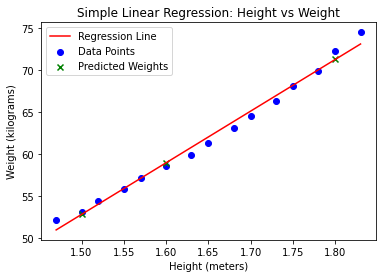

In [305]:
# Create a scatter plot of the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Generate values for the regression line
x_values = np.linspace(min(x), max(x), 100)
y_values = betahat * x_values + alphahat

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Add the predicted points
plt.scatter(new_heights, y_preds, color='green', label='Predicted Weights', marker='x')

# Label the axes and add a title
plt.xlabel('Height (meters)')
plt.ylabel('Weight (kilograms)')
plt.title('Simple Linear Regression: Height vs Weight')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Above we described the analytical approach to estimate alphahat and betahat, now we cover the second approach the iterative approach.

In this approach we use gradient descent to get the values of alphahat and betahat which minimise the SSR. To do so we must first calculate the partial derivatives for SSR w.r.t alpha and beta. Doing this we get the equations:

$$\frac{\partial \text{RSS}}{\partial \alpha} = -2 \sum_{i=1}^{n} (y_i - (\beta x_i + \alpha))$$

$$ \frac{\partial \text{RSS}}{\partial \beta} = -2 \sum_{i=1}^{n} x_i (y_i - (\beta x_i + \alpha)) $$

Using these we can iteratively update the alphahat and betahat for n iterations.

To implement this we must have a loop for n iterations and perform gradient descent on each variable alphahat and betahat. This means we must minimise the value of SSR, to do so we calculate the value of both derivatives given each partial derivative and then we bump the value of alphahat and betahat in the opposite direction.

In [318]:
# The iterative approach using gradient descent

alphahat = 0
betahat = 0

iterations = 10000
learning_rate = 0.01

for i in range(iterations):
    y_preds = alphahat + betahat * x
    
    # Because we are using numpy arrays the y - y_preds will operate element wise we could use for loops to 
    # do the same thing here
    d_alpha = -2 * sum(y - y_preds)
    d_beta = -2 * sum(x * (y - y_preds))
    
    #update alpha and beta
    alphahat -= learning_rate * d_alpha
    betahat -=learning_rate * d_beta

print(sum(y - y_preds)**2)

2.3278817264294583e-08


In [316]:
alphahat, betahat

(-0.030514794617892832, 0.018426040786150507)

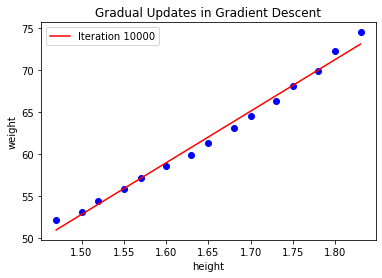

In [317]:
# Code to show the gradient descent in action
def plot_gradual_updates(x, y, learning_rate=0.1, iterations=[10, 100, 1000, 5000, 10000], pause_duration=1):
    n = len(y)
    alphahat, betahat = 0, 0  # Initialize alpha and beta

    plt.figure(figsize=(12, 8))

    max_iter = max(iterations)
    iteration_steps = set(iterations)

    for iteration in range(max_iter + 1):
        y_pred = alphahat + betahat * x

        # Calculate gradients
        d_alpha = (-2/n) * sum(y - y_pred)
        d_beta = (-2/n) * sum(x * (y - y_pred))

        # Update alpha and beta
        alphahat -= learning_rate * d_alpha
        betahat -= learning_rate * d_beta

        if iteration in iteration_steps:
            # Clear the previous plot and plot the new line and data points
            clear_output(wait=True)
            plt.scatter(x, y, color='blue', label='Data points' if iteration == 0 else "")
            plt.plot(x, y_pred, color='red', label=f'Iteration {iteration}')
            plt.xlabel('height')
            plt.ylabel('weight')
            plt.title('Gradual Updates in Gradient Descent')
            plt.legend()
            plt.show()
            plt.pause(pause_duration)

# Call the function for gradual updates
plot_gradual_updates(x, y, pause_duration=2)


In [268]:
# Continue using the height vs weight and demo on this at the end if time allows

salary_data = pd.read_csv('/Users/moose/Documents/PyCharm_Projects/Karpathy_NN_course/Salary_dataset.csv')
salary_data.drop('Unnamed: 0', axis=1, inplace=True)
salary_data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [269]:
# function for analytical simple LR

def analytic_approach_simple_LR(x, y):
    xbar = x.mean()
    ybar = y.mean()

    # beta hat
    sum_numerator = 0
    sum_denominator = 0

    for xi, yi in zip(x, y):
        sum_numerator += (xi - xbar) * (yi - ybar)
        sum_denominator += (xi-xbar) ** 2

    betahat = sum_numerator / sum_denominator

    # alpha hat
    alphahat = ybar - (betahat*xbar)
    
    return alphahat, betahat

def iterative_approach_simple_LR(x, y):
    # The iterative approach using gradient descent

    alphahat = 0
    betahat = 0

    iterations = 10000
    learning_rate = 0.0001

    for i in range(iterations):
        y_preds = alphahat + betahat * x

        # Because we are using numpy arrays the y - y_preds will operate element wise we could use for loops to 
        # do the same thing here
        d_alpha = -2 * sum(y - y_preds)
        d_beta = -2 * sum(x * (y - y_preds))
    
        #update alpha and beta
        alphahat -= learning_rate * d_alpha
        betahat -=learning_rate * d_beta
    
    return alphahat, betahat

In [270]:
x = np.array(salary_data['YearsExperience'])
y = np.array(salary_data['Salary'])

analytical_alphahat, analytical_betahat = analytic_approach_simple_LR(x, y)

iterative_alphahat, iterative_betahat = iterative_approach_simple_LR(x, y)

In [271]:
analytical_alphahat, analytical_betahat

(24848.203966523193, 9449.962321455077)

In [272]:
iterative_alphahat, iterative_betahat

(24848.103291551266, 9449.977097229259)

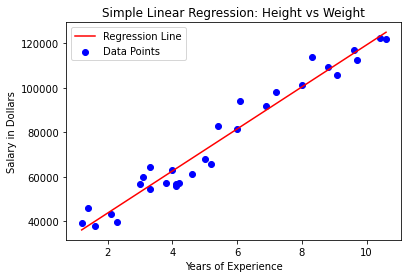

In [273]:
# Create a scatter plot of the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Generate values for the regression line
x_values = np.linspace(min(x), max(x), 100)
y_values = analytical_betahat * x_values + analytical_alphahat

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Label the axes and add a title
plt.xlabel('Years of Experience')
plt.ylabel('Salary in Dollars')
plt.title('Simple Linear Regression: Height vs Weight')

# Add a legend
plt.legend()

# Show the plot
plt.show()

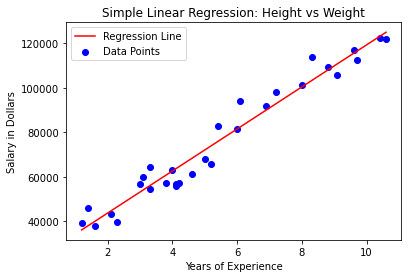

In [274]:
# Create a scatter plot of the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Generate values for the regression line
x_values = np.linspace(min(x), max(x), 100)
y_values = iterative_betahat * x_values + iterative_alphahat

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Label the axes and add a title
plt.xlabel('Years of Experience')
plt.ylabel('Salary in Dollars')
plt.title('Simple Linear Regression: Height vs Weight')

# Add a legend
plt.legend()

# Show the plot
plt.show()